In [2]:
#importation des librairies nécéssaires
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

dataset = pd.read_csv('AEP_hourly_test.csv')
dataset = dataset.set_index('Datetime')
dataset.index = pd.to_datetime(dataset.index)

In [3]:
#info du dataset
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


(121273, 1)

In [4]:
#comptage du nombre de données manquantes dans le dataset
dataset.isnull().sum()

AEP_MW    0
dtype: int64

In [5]:
#résumé statistique
dataset.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


<AxesSubplot: title={'center': 'Energy use in MW'}, xlabel='Datetime'>

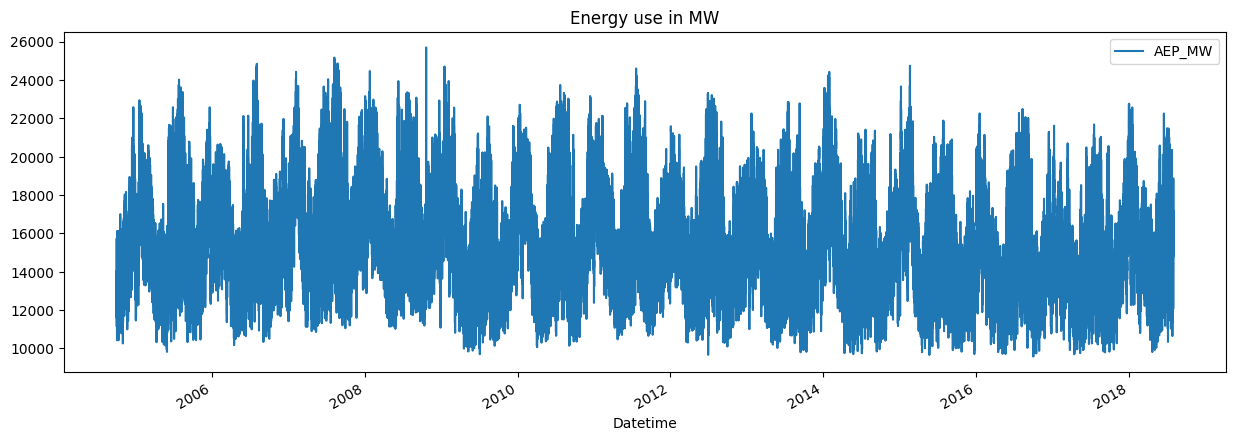

In [6]:
# plot des données 
dataset.plot(figsize=(15,5),title='Energy use in MW')

In [7]:
#split train et test
nb_lines = dataset.shape[0]
train = dataset.iloc[:int(nb_lines*0.8)]
test = dataset.iloc[int(nb_lines*0.8)+1:]

<AxesSubplot: title={'center': 'Energy use in MW'}, xlabel='Datetime'>

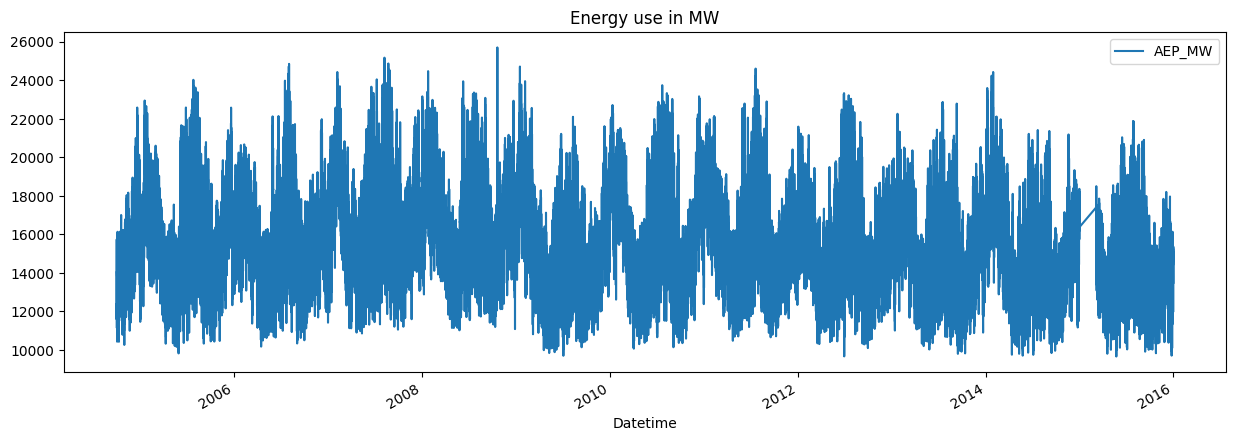

In [8]:
train.plot(figsize=(15,5),title='Energy use in MW')

In [9]:
def creation_index_temps(ds):
    ds['Heure']=ds.index.hour
    ds['Jour(Semaine)']=ds.index.dayofweek
    ds['Semaine']=ds.index.week
    ds['Mois']=ds.index.month
    ds['Année']=ds.index.year
    ds['Jour(Année)']=ds.index.dayofyear
    return ds

In [10]:
creation_index_temps(dataset)

C:\Users\tautu\AppData\Local\Temp\ipykernel_4864\3454568929.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ds['Semaine']=ds.index.week


,AEP_MW,Heure,Jour(Semaine),Semaine,Mois,Année,Jour(Année)
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,53,12,2004,366
2004-12-31 02:00:00,12865.0,2,4,53,12,2004,366
2004-12-31 03:00:00,12577.0,3,4,53,12,2004,366
2004-12-31 04:00:00,12517.0,4,4,53,12,2004,366
2004-12-31 05:00:00,12670.0,5,4,53,12,2004,366
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1


In [11]:
train = creation_index_temps(train)
test = creation_index_temps(test)

C:\Users\tautu\AppData\Local\Temp\ipykernel_4864\3454568929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Heure']=ds.index.hour
C:\Users\tautu\AppData\Local\Temp\ipykernel_4864\3454568929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Jour(Semaine)']=ds.index.dayofweek
C:\Users\tautu\AppData\Local\Temp\ipykernel_4864\3454568929.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce th

In [12]:
ENTREES = ['Heure', 'Jour(Semaine)', 'Semaine', 'Mois', 'Année', 'Jour(Année)']
SORTIE = ['AEP_MW']

In [13]:
X_train = train[ENTREES]
Y_train = train[SORTIE]

X_test = test[ENTREES]
Y_test = test[SORTIE]

In [14]:
reg = xgb.XGBRegressor(
    n_estimators=20000,
    early_stopping_rounds=100,
    learning_rate=0.0005)
reg.fit(
    X_train, Y_train,
    eval_set=[(X_train, Y_train),(X_test,Y_test)],
    verbose=1000)

[0]	validation_0-rmse:15833.24987	validation_1-rmse:15187.83113
[1000]	validation_0-rmse:9682.82903	validation_1-rmse:9054.99661
[2000]	validation_0-rmse:5988.82135	validation_1-rmse:5526.73797
[3000]	validation_0-rmse:3797.08773	validation_1-rmse:3500.93681
[4000]	validation_0-rmse:2529.54561	validation_1-rmse:2433.33094
[5000]	validation_0-rmse:1836.30727	validation_1-rmse:1946.62498
[6000]	validation_0-rmse:1479.53370	validation_1-rmse:1760.08741
[7000]	validation_0-rmse:1298.76877	validation_1-rmse:1694.12441
[8000]	validation_0-rmse:1205.51520	validation_1-rmse:1669.25979
[9000]	validation_0-rmse:1151.87612	validation_1-rmse:1661.11543
[9662]	validation_0-rmse:1126.33845	validation_1-rmse:1659.60121


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=100, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0005, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot: title={'center': 'Importance des facteurs utilisées dans le modèle'}>

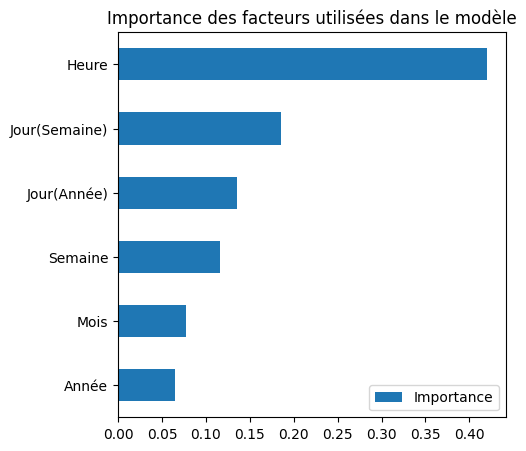

In [18]:
imp = pd.DataFrame(
    data=reg.feature_importances_,
    index=reg.feature_names_in_,
    columns=['Importance'])

imp.sort_values('Importance').plot(
    figsize=(5,5),
    kind='barh',
    title='Importance des facteurs utilisées dans le modèle')

C:\Users\tautu\AppData\Local\Temp\ipykernel_4864\405834718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


Text(0.5, 1.0, 'Prédictions et donénes brutes')

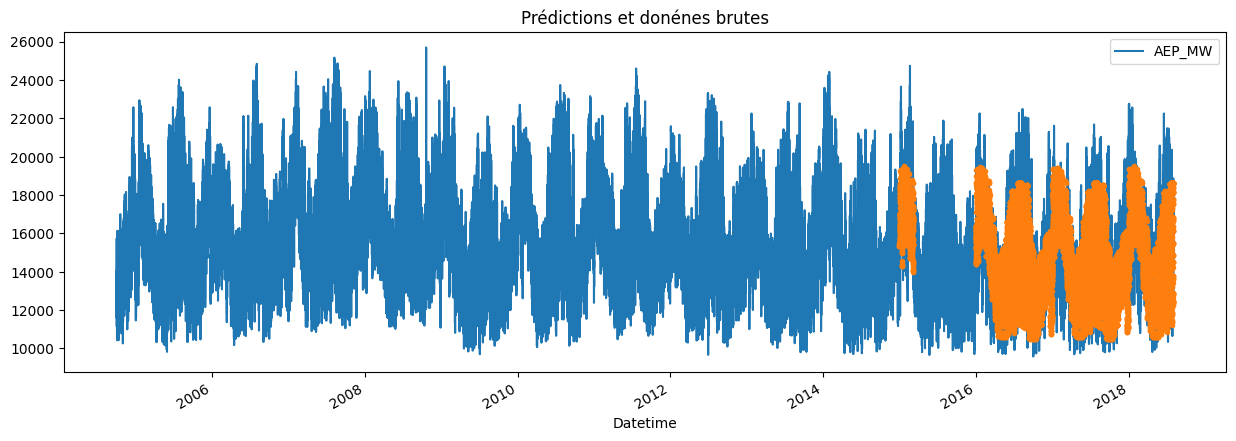

In [19]:
test['prediction'] = reg.predict(X_test)
dataset = dataset.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = dataset[['AEP_MW']].plot(figsize=(15,5))
dataset['prediction'].plot(ax=ax,style='.')
ax.set_title('Prédictions et donénes brutes')

In [20]:
test_predic = dataset.iloc[int(nb_lines*0.8)+1:]

<AxesSubplot: xlabel='Datetime'>

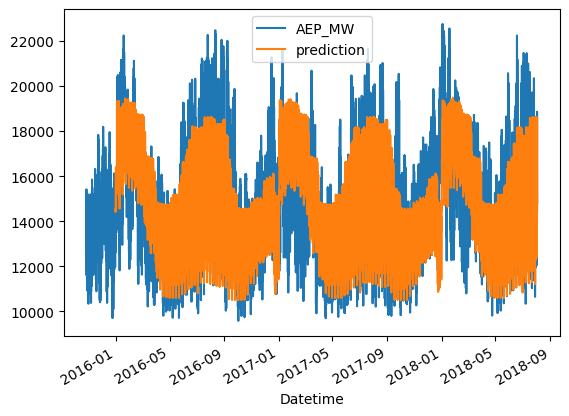

In [21]:
test_predic.plot(y=['AEP_MW','prediction'])

In [22]:
score = mean_squared_error(test['AEP_MW'], test['prediction'], squared=False)
print('RMSE =', score)

RMSE = 1659.547568510503
